PHYS 514 -- Final Project -- Tevfik Can Yüce, 64065

Einstein Part

In [9]:
import numpy as np
import einstein_functions
import matplotlib.pyplot as plt
import scipy.constants as constants
from scipy.interpolate import CubicSpline
from scipy.optimize import fsolve
solar_mass = 1.98847e30 #kg
length_unit = 1477.0 #m

Part (a):

d:\ELEC COURSES\PHYS514\Final Project\einstein_functions.py:23: RuntimeWarning: invalid value encountered in sqrt
  rho = np.sqrt(y[2]/K_NS)


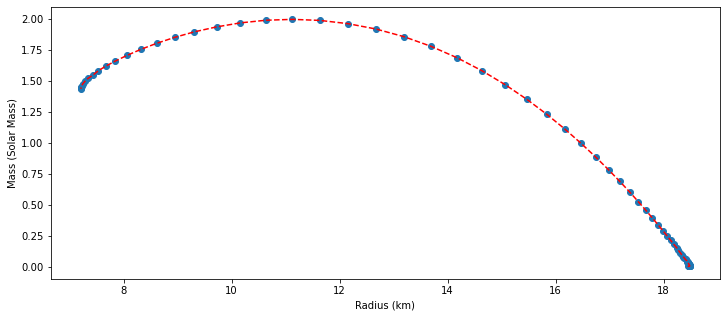

In [2]:
#This cell solves TOV equation for different central pressures and obtains an M-R curve
#Constants
K_NS = 100
N_samples = 70

#Central density and pressure values
rho_c_vals = np.logspace(-6,-1, N_samples)
p_c_vals = K_NS * np.power(rho_c_vals, 2)

#Solve TOV equation for different central pressure values
R_vals = []
M_vals = []
for p_c in p_c_vals:
    R, M = einstein_functions.solve_TOV(p_c=p_c)
    R_vals.append(R)
    M_vals.append(M)

R_vals = np.asarray(R_vals).astype(float)
M_vals = np.asarray(M_vals).astype(float)

#Plot the result
plt.figure(figsize=(12,5))
plt.scatter(x=R_vals*1.477, y=M_vals)
plt.plot(R_vals*1.477, M_vals, '--', color='red')
plt.xlabel('Radius (km)')
plt.ylabel('Mass (Solar Mass)')
plt.show()

Part (b):

d:\ELEC COURSES\PHYS514\Final Project\einstein_functions.py:55: RuntimeWarning: invalid value encountered in sqrt
  rho = np.sqrt(y[2]/K_NS)


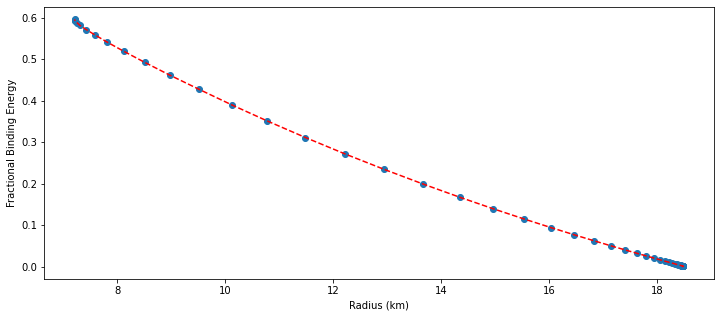

In [3]:
#This cell solves TOV equation with baryonic mass for different central pressures and obtains an M-R curve
#Constants
K_NS = 100
N_samples = 50

#Central density and pressure values
rho_c_vals = np.logspace(-6,-1, N_samples)
p_c_vals = K_NS * np.power(rho_c_vals, 2)

#Solve TOV equation for different central pressure values
R_vals = []
M_vals = []
M_p_vals = []
for p_c in p_c_vals:
    R, M, M_p = einstein_functions.solve_TOV_mp(p_c=p_c)
    R_vals.append(R)
    M_vals.append(M)
    M_p_vals.append(M_p)

R_vals = np.asarray(R_vals).astype(float)
M_vals = np.asarray(M_vals).astype(float)
M_p_vals = np.asarray(M_p_vals).astype(float)

#Calculate fractional bind energy
delta_vals = (M_p_vals - M_vals)/M_vals

#Plot the result
plt.figure(figsize=(12,5))
plt.scatter(x=R_vals*1.477, y=delta_vals)
plt.plot(R_vals*1.477, delta_vals, '--', color='red')
plt.xlabel('Radius (km)')
plt.ylabel('Fractional Binding Energy')
plt.show()

Part (c):

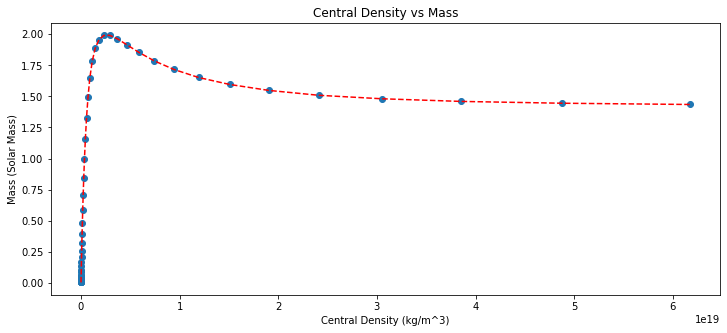

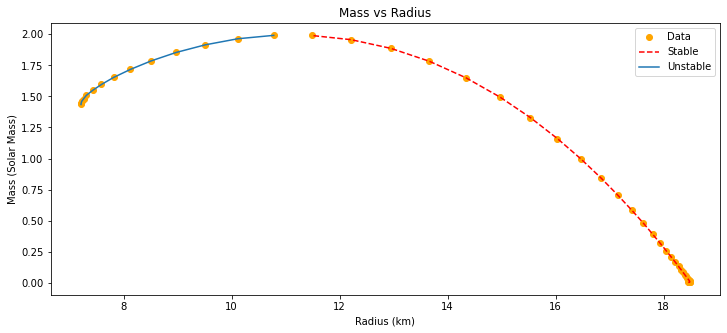

Maximum NS Mass = 1.9912571488099948 Solar Masses


In [4]:
#Plotting M vs central density for different neutron stars and investigating stability
#Use the same data used in the previous part

#Constant to convert central density value to kg/m^3
density_constant = solar_mass/np.float_power(length_unit, 3)

plt.figure(figsize=(12,5))
plt.scatter(x=rho_c_vals * density_constant, y=M_vals) #Need to check unit of density
plt.plot(rho_c_vals * density_constant, M_vals, '--', color='red')
plt.title('Central Density vs Mass')
plt.ylabel('Mass (Solar Mass)')
plt.xlabel('Central Density (kg/m^3)')
plt.show()

#Determine stable and unstable stars
max_mass_idx = M_vals.argmax() #Index of maximum mass

#Stable and Unstable Branches in M-R plot
plt.figure(figsize=(12,5))
plt.scatter(x=R_vals*1.477, y=M_vals, color='orange')
plt.plot(R_vals[0:max_mass_idx] * 1.477, M_vals[0:max_mass_idx], '--', color='red') #Stable stars
plt.plot(R_vals[max_mass_idx:] * 1.477, M_vals[max_mass_idx:])
plt.legend(['Data','Stable','Unstable'])
plt.title('Mass vs Radius')
plt.ylabel('Mass (Solar Mass)')
plt.xlabel('Radius (km)')
plt.show()

#Report Maximum Mass
print('Maximum NS Mass = ' + str(M_vals[max_mass_idx]) + ' Solar Masses')

Part (d):

d:\ELEC COURSES\PHYS514\Final Project\einstein_functions.py:23: RuntimeWarning: invalid value encountered in sqrt
  rho = np.sqrt(y[2]/K_NS)


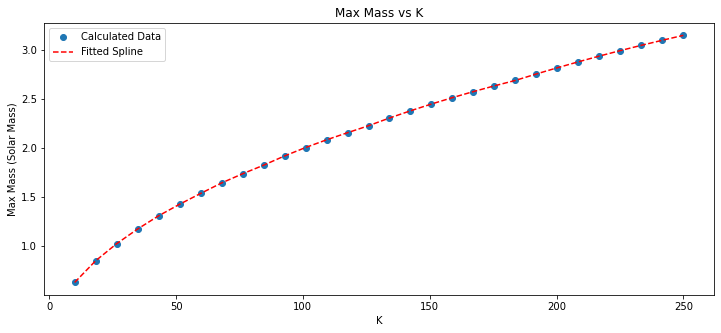

Maximum allowed K is 115.6892072542364


In [11]:
#This cell computes maximum mass for differnt values of K_NS
N_rho_c_samples = 30 #Number of rho_c samples
N_K_NS_samples = 30 #Number of samples of K_NS values
K_NS_min = 10 #Minimum K_NS values to be used
K_NS_max = 250 #Maximum K_NS values to be used
K_NS_vals = np.linspace(K_NS_min, K_NS_max, N_K_NS_samples) #K_NS values to be max mass calculated

#Iterate over K_NS values and find maximum mass
max_M_vals = [] #Initialize array for max M
for K_NS in K_NS_vals:
    rho_c_vals = np.logspace(-6,-1, N_rho_c_samples)
    p_c_vals = K_NS * np.power(rho_c_vals, 2)
    M_vals = [] #Initialize mass array
    #Calculate M-R for different rho_c values
    for p_c in p_c_vals:
        R, M = einstein_functions.solve_TOV(p_c=p_c, K_NS=K_NS)
        M_vals.append(M)
    M_vals = np.asarray(M_vals).astype(float)
    #Find maximum mass and append to list
    max_M_vals.append(np.max(M_vals))

max_M_vals = np.asarray(max_M_vals).astype(float) #Convert list to numpy array

#Fit Spline to Calculated Values
K_max_M_spline = CubicSpline(x=K_NS_vals, y=max_M_vals)

#Find the points where spline equals to 2.14 Solar Mass
#Define function to be used in scipy.optimize.fsolve
def K_max_find(x):
    return K_max_M_spline(x) - 2.14

K_max = fsolve(func=K_max_find, x0=100)

#Plot the results
plt.figure(figsize=(12,5))
plt.scatter(x=K_NS_vals, y=max_M_vals)
plt.plot(K_NS_vals, K_max_M_spline(K_NS_vals), '--', color='red')
plt.legend(['Calculated Data', 'Fitted Spline'])
plt.xlabel('K')
plt.ylabel('Max Mass (Solar Mass)')
plt.title('Max Mass vs K')
plt.show()

print('Maximum allowed K is ' + str(K_max[0]))
